<a href="https://colab.research.google.com/github/joaovitormelo/trabalhos-ufv/blob/main/trabalho1_inf150.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[assistas os vídeos de apoio se estiver com dúvidas](https://www.youtube.com/playlist?list=PLcvOyD_LMr6lXoCuJu1nT6M9yejqk4Kz6)

# Trabalho 1

Com até 5 integrantes, complete a tabela com os nomes e matriculas:

Nome      | Matricula
---       |---
 1.       |
 2.       |
 3.       |
 4.       |
 5.       |

In [ ]:
# Digitar a lista das matriculas

Mat = [7172, 23224, 23323, 12232, 342121]

# Portas de 3 Entradas

tabela com as funções de três entradas:

![](https://github.com/arduinoufv/inf150/blob/master/aulas2023/10_portas_universais_de_3.png?raw=true)

## Qual o mínimo de portas para montar um And2 ou um Xor2 com portas de três entradas

![](https://github.com/arduinoufv/inf150/blob/master/aulas2023/portas_de2_com_portas_de_3.png?raw=true)

Por exemplo, a Função $and3 = x \& y \& z$ pode ser usada para fazer a função $and2 = a \& b$:

 fazendo $and2 = and3(a,b,1) = a \& b \& 1 = a \& b$

 Outro exemplo é a função AndXor = $ x \oplus y \& z$, podemos também fazer o and2:

 $and2 = AndXor(0,a,b) = 0 \oplus (a \& b) = a \& b$.



In [1]:
#@title Instalando Verilog
!pip install git+https://github.com/lesc-ufv/cad4u >& /dev/null
!git clone https://github.com/lesc-ufv/cad4u >& /dev/null
%load_ext plugin

## And2 usando And3

$and2 = and3(a,b,1) = a \& b \& 1 = a \& b$

![](https://github.com/arduinoufv/inf150/blob/master/aulas2023/trabalho1/figuras/and2_com_and3.png?raw=true)

Outras soluções (teste)

$and2 = and3(a,b,b)$

$and2 = and3(a,a,b)$

$and2 = and3(1,a,b)$



### Mostrando o desenho da AND2 usando a and3

Installing. Please wait... done!
/content/cad4u/verilog/yosys_command.sh AND2 code.v


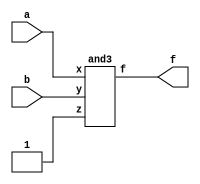

In [2]:
%%print_verilog -top AND2
module AND2(input a,b, output f);
  and3 G(a,b,1,f);
endmodule

module and3(input x,y,z, output f);
  assign f = x & y & z;
endmodule


### Código de teste

Este código irá gerar todas as combinações para testar as duas versões, a porta original **and2** com a equação $a\&b$ e a porta **AND2** que foi construída usando uma porta **and3** com a atribuição correta nas entradas, onde $x \leftarrow a, y \leftarrow b, z \leftarrow 1$.

In [3]:
%%writefile verificacao.v
// Verificacao
module logic_testbench();
reg [1:0] counter;
wire And2,A2comA3;
wire a,b;
integer k;

assign a = counter[1];
assign b = counter[0];


and2 G1(a,b,And2);
AND2 G2(a,b,A2comA3);

	initial begin
  	$display("Tabela Verdade");
		$display("L   ab  | And2   AND2");
		$monitor("%d   %2b  | %1b       %1b ", counter, counter, And2, A2comA3);
		counter = 0;
		for (k=1; k<4; k=k+1)
     #1 counter = k;
		$finish;
	end
endmodule

Writing verificacao.v


### Código que **implementa** a AND2 com modulo da and3.

In [4]:
%%verilog 
// porta BASE
module and3(input x,y,z, output f);  
  assign f = x & y & z;         //  ** AQUI é a equação da porta and3 **
endmodule

// Porta ALVO
module and2(input a,b, output f);
  assign f = a & b;           //  ** AQUI é a equação da porta and2 original  **
endmodule

// SOLUCAO
module AND2(input a,b, output f); 
  and3 G(a,b,1,f);    //  ** AQUI é porta AND2 sendo construída com um modulo interno and3 **
endmodule

`include "verificacao.v"



Tabela Verdade
L   ab  | And2   AND2
0   00  | 0       0 
1   01  | 0       0 
2   10  | 0       0 
3   11  | 1       1 



## And2 usando AndXor

$and2 = AndXor(0,a,b) = 0 \oplus (a \& b) = a \& b$


![](https://github.com/arduinoufv/inf150/blob/master/aulas2023/trabalho1/figuras/and2_com_andxor.png?raw=true)

outras opções

$and2 = AndXor(0,b,a) = 0 \oplus (b \& a) = b \& a$





/content/cad4u/verilog/yosys_command.sh AND2 code.v


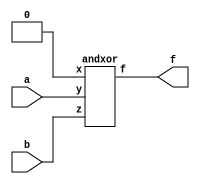

In [ ]:
%%print_verilog -top AND2
module andxor(input x,y,z, output f);
  assign f = x ^ y & z;
endmodule

// SOLUCAO
module AND2(input a,b, output f);
  andxor G(0,a,b,f);
endmodule

In [ ]:
%%verilog 
// porta BASE
module andxor(input x,y,z, output f);
  assign f = x ^ y & z;  //  ** AQUI é a equação da porta andxor **
endmodule

// Porta ALVO
module and2(input a,b, output f);
  assign f = a & b;    //  ** AQUI é a equação da porta and2 original  **
endmodule

// SOLUCAO
module AND2(input a,b, output f);
  andxor G(0,b,a,f);    //  ** AQUI é porta AND2 sendo construída com um modulo interno andxor **
endmodule

`include "verificacao.v"

Tabela Verdade
L   ab  | And2   AND2
0   00  | 0       0 
1   01  | 0       0 
2   10  | 0       0 
3   11  | 1       1 



## Parte 1 do Trabalho

Para o seu grupo, executa a célula abaixo para saber quais as portas terá que fazer. 

1. Gera uma célula texto com as explicações de como chegou na combinação de argumentos

2. Faça o código verilog para mostrar que funciona.

In [ ]:
#@title Gerando a parte I - Tem que **EXECUTAR ESTA CÉLULA !!!**
L = [ "dot","onehot","Mux","XorAnd","Gamble","OrAnd","Majority"]

D = {}
print("a) Faça uma porta and2 usando somente uma porta ",L[(sum(Mat)//197)%len(L)])
D[L[(sum(Mat)//197)%len(L)]] = 1
x=157
while (L[(sum(Mat)//x)%len(L)] in D):
  x = x+1 
D[L[(sum(Mat)//x)%len(L)]]  = 1
print("b) Faça uma porta and2 usando somente uma porta ",L[(sum(Mat)//x)%len(L)])
x= 137
while (L[(sum(Mat)//x)%len(L)] in D):
  x = x+1 
D[L[(sum(Mat)//x)%len(L)]]  = 1
print("c) Faça uma porta and2 usando somente uma porta ",L[(sum(Mat)//x)%len(L)])
x= 487
while (L[(sum(Mat)//x)%5] in D):
  x = x+1 
print("d) Faça uma porta xor2 usando somente uma porta ",L[(sum(Mat)//x)%5])

a) Faça uma porta and2 usando somente uma porta  Majority
b) Faça uma porta and2 usando somente uma porta  Mux
c) Faça uma porta and2 usando somente uma porta  XorAnd
d) Faça uma porta xor2 usando somente uma porta  onehot


### Material de apoio

[esboço dos desenhos no excalidraw](https://excalidraw.com/#json=AYXdp9PN6-saSNvcizvFx,8fIfOYrj8qde4r5fROT-WQ)

### **a)** porta and2 usando somente uma porta  Majority

Com o input x sendo 0, a porta majority apenas dará 1 caso tanto y e z sejam 1, o que corresponde ao mesmo comportamento da porta and2.


In [5]:
%%verilog 
// porta BASE
module maj(input x,y,z, output f);
  assign f = x & z | x & y | y & z;  //  ** AQUI é a equação da porta maj, sua porta pode ser outra... **
endmodule

// Porta ALVO
module and2(input a,b, output f);
  assign f = a & b;    //  ** AQUI é a equação da porta and2 original  **
endmodule

// SOLUCAO
module AND2(input a,b, output f);
  maj G(0, a, b,f);    //  ** AQUI é porta AND2 sendo construída com um modulo interno maj **
endmodule

`include "verificacao.v"

Tabela Verdade
L   ab  | And2   AND2
0   00  | 0       0 
1   01  | 0       0 
2   10  | 0       0 
3   11  | 1       1 



### **b)**

### **c)**

### **d)**

In [ ]:
%%writefile verificacao_xor2.v
// Verificacao
module logic_testbench();
reg [1:0] counter;
wire xor2,Xor2;
wire a,b;
integer k;

assign a = counter[1];
assign b = counter[0];


xor2 G1(a,b,xor2);
XOR2 G2(a,b,Xor2);

	initial begin
  	$display("Tabela Verdade");
		$display("L   ab  | Xor2   XOR2");
		$monitor("%d   %2b  | %1b       %1b ", counter, counter, xor2, Xor2);
		counter = 0;
		for (k=1; k<4; k=k+1)
     #1 counter = k;
		$finish;
	end
endmodule

Overwriting verificacao_xor2.v


In [ ]:
%%verilog 
// porta BASE
module gamble(input x,y,z, output f);
  assign f = (x & y & z) ^ (~x & ~y & ~z) ;  //  ** AQUI é a equação da porta gamble sua porta pode ser outra... **
endmodule

// Porta ALVO
module xor2(input a,b, output f);
  assign f = a ^ b;    //  ** AQUI é a equação da porta xor2 original  **
endmodule

// SOLUCAO
module XOR2(input a,b, output f);
  gamble G(   );   // PREENCHER....
endmodule

`include "verificacao_xor2.v"

Tabela Verdade
L   ab  | Xor2   XOR2
0   00  | 0       0 
1   01  | 1       1 
2   10  | 1       1 
3   11  | 0       0 



## Portas de 3 para fazer portas de 3

![](https://github.com/arduinoufv/inf150/blob/master/aulas2023/portas_3_com_portas_de_3.png?raw=true)

## Porta Multiplexador


Podemos fazer qualquer função com 7 portas multiplexador no formato de arvore. Basta colocar valores nas entradas

![](https://2.bp.blogspot.com/-WrtBvWKZLrQ/V2v-PoHCxnI/AAAAAAAAAas/Sv4V7j4W2p4bvgGGrvYpXoSBpqphGtsHgCK4B/s640/8x1%2Bmux%2Bstructure.png)



### Exemplo porta And3 $f= x \& y \& z$

Abaixo como fazer a porta And3. Começamos com todos os valores da função. 

Depois simplificamos os mux com entradas iguais.

Depois simplificamos o mux do primeiro nivel pela variável.

![](https://github.com/arduinoufv/inf150/blob/master/aulas2023/and3_com_mux.png?raw=true)

/content/cad4u/verilog/yosys_command.sh Mux code.v


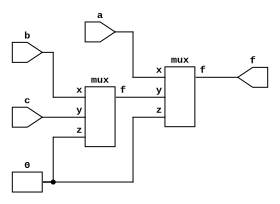

In [ ]:
%%print_verilog -top AND3
// porta BASE
module mux(input x,y,z, output f);
  assign f = x ? y: z; // f = x & y | ~x & z;
endmodule

// SOLUCAO
module AND3(input a,b,c, output f);
wire W1;
  mux G1(b,c,0,W1);
  mux G2(a,W1,0,f);
endmodule

In [ ]:
%%verilog 
// porta BASE
module mux(input x,y,z, output f);
  assign f = x ? y: z; // f = x & y | ~x & z;
endmodule

// Porta ALVO
module and3(input a,b,c, output f);
  assign f = a & b & c;
endmodule

// SOLUCAO usando só portas MUX
module AND3(input a,b,c, output f);
wire W1;
  mux G1(b,c,0,W1);
  mux G2(a,W1,0,f);
endmodule

// Verificacao
module logic_testbench();
reg [2:0] counter;
wire And3,Nova;
wire a,b,c;
integer k;

assign a = counter[2];
assign b = counter[1];
assign c = counter[0];



and3 G1(a,b,c,And3);
AND3 G2(a,b,c,Nova);

	initial begin
  	$display("Tabela Verdade");
		$display(" L   abc | And3 And3_com_Mux");
		$monitor("%d   %3b  | %1b       %1b ", counter, counter,  counter, And3, Nova);
		counter = 0;
		for (k=1; k<8; k=k+1)
     #1 counter = k;
		$finish;
	end
endmodule

Tabela Verdade
 L   abc | And3 And3_com_Mux
0   000  | 000       0 0
1   001  | 001       0 0
2   010  | 010       0 0
3   011  | 011       0 0
4   100  | 100       0 0
5   101  | 101       0 0
6   110  | 110       0 0
7   111  | 111       1 1



### Parte II do Trabalho

Execute a célula abaixo para fazer as portas de três usando somente 2 portas MUX. Monte o Verilog para comprovar o funcionamento.

In [ ]:
#@title Gerando a parte II
D ={}
L = [ "dot","AndXor", "XorAnd","OrAnd","Majority","Xor3"]
D[L[(sum(Mat)//197)%len(L)]]  = 1
print("a) Faça uma porta ",L[(sum(Mat)//197)%len(L)]," usando 2 Mux")
x= 2113
while (L[(sum(Mat)//x)%len(L)] in D):
  x = x+1 
print("b) Faça uma porta ",L[(sum(Mat)//x)%len(L)]," usando 2 Mux")


a) Faça uma porta  AndXor  usando 2 Mux
b) Faça uma porta  dot  usando 2 Mux


#### **a)**

#### **b)**

## Pontos Extras

Com duas portas DOT podemos fazer várias portas de 3.

Execute a célula a abaixo e tente fazer os desafios:

In [ ]:
#@title Desafios
L = [ "Onehot","AndXor", "XorAnd","OrAnd","Majority","Xor3","Mux"]
D[L[(sum(Mat)//197)%len(L)]]  = 1
print("a) Faça uma porta ",L[(sum(Mat)//197)%len(L)]," usando 2 Dot")
x= 2113
while (L[(sum(Mat)//x)%len(L)] in D):
  x = x+1 
print("b) Faça uma porta ",L[(sum(Mat)//x)%len(L)]," usando 2 Dot")


a) Faça uma porta  Mux  usando 2 Dot
b) Faça uma porta  Majority  usando 2 Dot
